<a href="https://colab.research.google.com/github/sridattagrandhi/California_Earthquakes/blob/main/California_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
%pip install --upgrade plotly

In [197]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestRegressor

In [198]:
df = pd.read_csv('2023.csv')

In [199]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-06T23:49:37.581Z,65.061800,-146.984600,0.00,1.00,ml,NaN,NaN,NaN,0.37,...,2023-01-24T15:40:03.995Z,"20 km NNW of Pleasant Valley, Alaska",explosion,NaN,0.000,NaN,NaN,reviewed,ak,ak
1,2023-01-06T23:45:51.310Z,38.797667,-122.752500,2.56,0.60,md,7.0,147.0,0.006363,0.01,...,2023-01-12T22:10:47.774Z,"2km N of The Geysers, CA",earthquake,0.58,0.370,NaN,1.0,reviewed,nc,nc
2,2023-01-06T23:45:10.930Z,38.847668,-122.817169,1.73,0.72,md,10.0,91.0,0.008487,0.02,...,2023-01-07T00:24:12.375Z,"9km WNW of Cobb, CA",earthquake,0.40,1.160,0.110000,10.0,automatic,nc,nc
3,2023-01-06T23:40:25.140Z,58.171333,-155.310000,0.55,-0.42,ml,6.0,171.0,NaN,0.08,...,2023-01-07T04:02:58.710Z,"84 km NW of Karluk, Alaska",earthquake,0.29,1.660,0.205044,6.0,reviewed,av,av
4,2023-01-06T23:39:51.557Z,60.656500,-44.051300,10.00,4.30,mb,51.0,84.0,0.838000,0.70,...,2023-03-11T22:51:43.040Z,"87 km NE of Nanortalik, Greenland",earthquake,5.37,1.887,0.098000,29.0,reviewed,us,us


In [200]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2368,2023-01-01T00:32:22.630Z,33.408000,-116.616833,7.52,0.84,ml,41.0,37.0,0.07285,0.16,...,2023-01-03T21:42:06.029Z,"14km N of Warner Springs, CA",earthquake,0.18,0.49,0.076,16.0,reviewed,ci,ci
2369,2023-01-01T00:25:46.311Z,63.297000,-145.178900,2.80,1.70,ml,NaN,NaN,NaN,0.37,...,2023-01-18T17:06:57.007Z,"31 km NE of Paxson, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
2370,2023-01-01T00:13:35.730Z,61.685400,-149.669200,39.90,1.20,ml,NaN,NaN,NaN,0.48,...,2023-01-18T17:07:00.788Z,"7 km NNW of Meadow Lakes, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak
2371,2023-01-01T00:07:05.430Z,38.783500,-122.754500,1.69,0.69,md,32.0,74.0,0.01389,0.03,...,2023-01-10T18:17:17.080Z,"1km NNE of The Geysers, CA",earthquake,0.15,0.22,0.146,5.0,reviewed,nc,nc
2372,2023-01-01T00:06:14.840Z,38.783667,-122.753667,1.62,0.09,md,17.0,88.0,0.01325,0.02,...,2023-01-10T07:11:14.067Z,"1km NNE of The Geysers, CA",earthquake,0.21,0.38,0.110,3.0,reviewed,nc,nc


In [201]:
df.shape

(2373, 22)

In [202]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [203]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [204]:
df['time'] = pd.to_datetime(df['time'])

In [205]:
df.dtypes

time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

In [206]:
df.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2369,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
2370,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
2371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [207]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                 714
gap                 714
dmin               1167
rms                   0
net                   0
id                    0
updated               0
place                69
type                  0
horizontalError     804
depthError            0
magError            737
magNst              719
status                0
locationSource        0
magSource             0
dtype: int64

In [208]:
#df = df.drop(['dmin', 'magError', 'magNst'], axis=1)

In [209]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [210]:
df['mag'] = df['mag'].fillna(df['mag'].mean())
#df['magType'] = df['magType'].fillna(df['magType'].mean())
df['nst'] = df['nst'].fillna(df['nst'].mean())
df['gap'] = df['gap'].fillna(df['gap'].mean())
df['dmin'] = df['dmin'].fillna(df['dmin'].mean())
#df['place'] = df['place'].fillna(df['place'].mean())
df['magError'] = df['magError'].fillna(df['magError'].mean())
df['magNst'] = df['magNst'].fillna(df['magNst'].mean())
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].mean())

In [211]:
df.isnull().sum()

time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             1
nst                 0
gap                 0
dmin                0
rms                 0
net                 0
id                  0
updated             0
place              69
type                0
horizontalError     0
depthError          0
magError            0
magNst              0
status              0
locationSource      0
magSource           0
dtype: int64

In [212]:
print(df['latitude'].describe())

count    2373.000000
mean       40.980535
std        21.828070
min       -65.407100
25%        33.400500
50%        40.603667
75%        58.250000
max        70.830500
Name: latitude, dtype: float64


In [213]:
print(df['longitude'].describe())

count    2373.000000
mean     -116.238058
std        74.196836
min      -179.973800
25%      -155.268667
50%      -147.025100
75%      -116.611500
max       179.599000
Name: longitude, dtype: float64


In [214]:
print(df['magType'].value_counts())

ml       1538
md        574
mb        226
mww        25
mwr         6
mw          2
mb_lg       1
Name: magType, dtype: int64


In [215]:
mask = df['mag'] <= 0
print(df[mask])

                                 time   latitude   longitude  depth   mag  \
3    2023-01-06 23:40:25.140000+00:00  58.171333 -155.310000   0.55 -0.42   
17   2023-01-06 22:44:30.220000+00:00  58.164667 -155.370833   1.75 -0.19   
56   2023-01-06 20:36:05.370000+00:00  58.184667 -155.334667   1.69 -0.34   
67   2023-01-06 19:36:35.950000+00:00  58.253000 -155.086667   3.75 -0.29   
89   2023-01-06 18:19:21.290000+00:00  58.165833 -155.349500  -0.31 -0.51   
...                               ...        ...         ...    ...   ...   
2299 2023-01-01 05:53:36.250000+00:00  58.181000 -155.306667   0.91 -0.11   
2300 2023-01-01 05:53:02.970000+00:00  58.185000 -155.302167   1.94 -0.06   
2301 2023-01-01 05:50:22.480000+00:00  58.171500 -155.321500   1.22 -0.07   
2311 2023-01-01 05:04:13.840000+00:00  58.239167 -155.173833   3.07 -0.51   
2358 2023-01-01 01:11:26.780000+00:00  58.179333 -155.318500   0.88 -0.21   

     magType   nst    gap      dmin   rms  ...                   updated  \

In [216]:
mask = df['depth'] < 0
print(df[mask])

                                 time   latitude   longitude     depth   mag  \
89   2023-01-06 18:19:21.290000+00:00  58.165833 -155.349500 -0.310000 -0.51   
177  2023-01-06 12:24:21.300000+00:00  38.809666 -122.717163 -0.850000  0.81   
209  2023-01-06 10:34:05.220000+00:00  19.423667 -155.269833 -0.030000  0.92   
241  2023-01-06 07:56:42.730000+00:00  54.691333 -163.676333 -0.670000 -0.07   
278  2023-01-06 04:47:50.430000+00:00  19.422833 -155.282667 -0.410000  1.46   
313  2023-01-06 03:04:39.530000+00:00  19.420833 -155.279000 -0.090000  1.93   
341  2023-01-06 01:34:55.280000+00:00  19.421833 -155.278833 -0.010000  1.43   
408  2023-01-05 22:23:12.950000+00:00  46.253333 -119.474167 -0.340000  1.61   
409  2023-01-05 22:13:47.280000+00:00  49.359500 -120.494833 -0.370000  1.93   
447  2023-01-05 20:05:37.950000+00:00  33.849500 -117.488333 -0.490000  1.31   
500  2023-01-05 16:38:59.280000+00:00  58.161167 -155.353833 -1.320000 -0.52   
583  2023-01-05 10:36:37.470000+00:00  1

In [217]:
# Check if any earthquake has a magnitude type that is not one of the 10 values we identified earlier
valid_mag_types = ['ml', 'md', 'mb', 'mww', 'mwr', 'mb_lg', 'mw', 'mh', 'mlv', 'mwc']
mask = ~df['magType'].isin(valid_mag_types)
print(df[mask])

                                 time   latitude   longitude  depth       mag  \
2287 2023-01-01 06:49:08.370000+00:00  36.595333 -121.199333    8.4  1.725978   

     magType   nst   gap     dmin   rms  ...                   updated  \
2287     NaN  44.0  66.0  0.02612  0.07  ...  2023-01-01T12:22:14.573Z   

                        place        type horizontalError depthError  \
2287  9km NW of Pinnacles, CA  earthquake            0.19       0.31   

      magError     magNst    status  locationSource magSource  
2287  0.240684  15.247279  reviewed              nc        nc  

[1 rows x 22 columns]


In [218]:
# Check if any earthquake has latitude or longitude values outside the range of [-90, 90] or [-180, 180], respectively
lat_mask = (df['latitude'] < -90) | (df['latitude'] > 90)
lon_mask = (df['longitude'] < -180) | (df['longitude'] > 180)
print(df[lat_mask | lon_mask])

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]


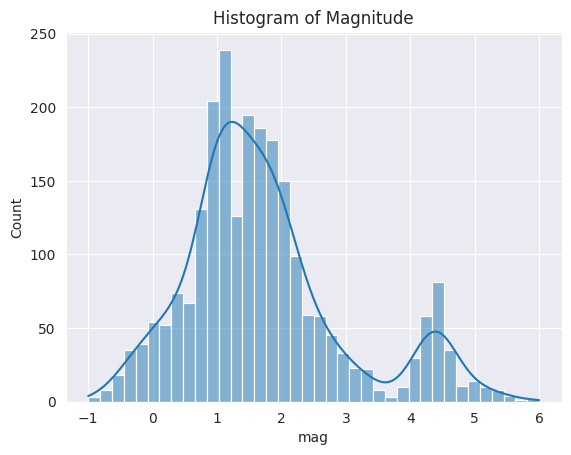

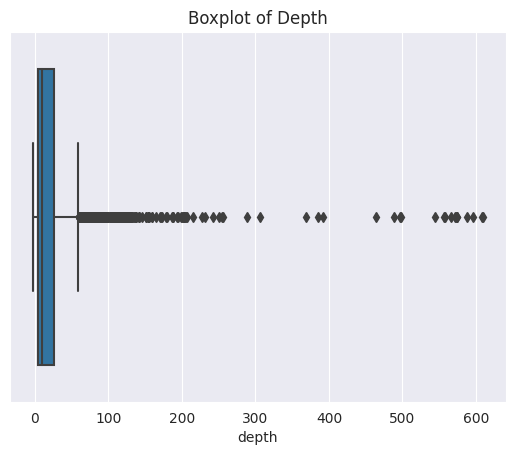

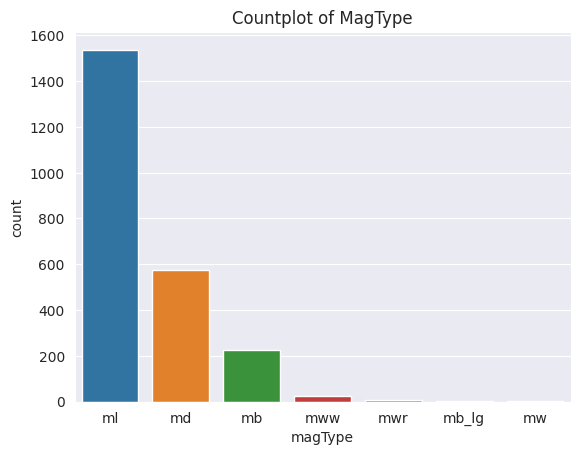

In [219]:
sns.histplot(data=df, x='mag', kde=True)
plt.title('Histogram of Magnitude')
plt.show()

# Boxplot of depth
sns.boxplot(data=df, x='depth')
plt.title('Boxplot of Depth')
plt.show()

# Countplot of magType
sns.countplot(data=df, x='magType')
plt.title('Countplot of MagType')
plt.show()


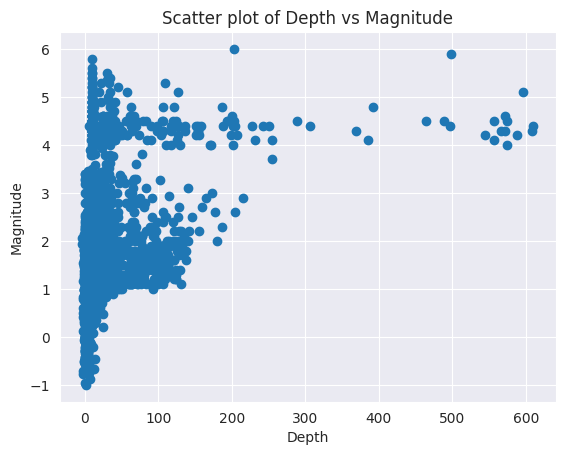

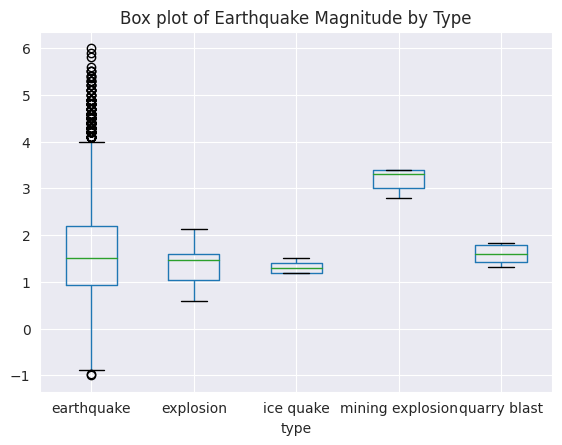

In [220]:
# Scatter plot of depth vs magnitude
plt.scatter(df['depth'], df['mag'])
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Scatter plot of Depth vs Magnitude')
plt.show()

# Box plot of earthquake magnitude by type
df.boxplot(column='mag', by='type')
plt.title('Box plot of Earthquake Magnitude by Type')
plt.suptitle('')
plt.show()

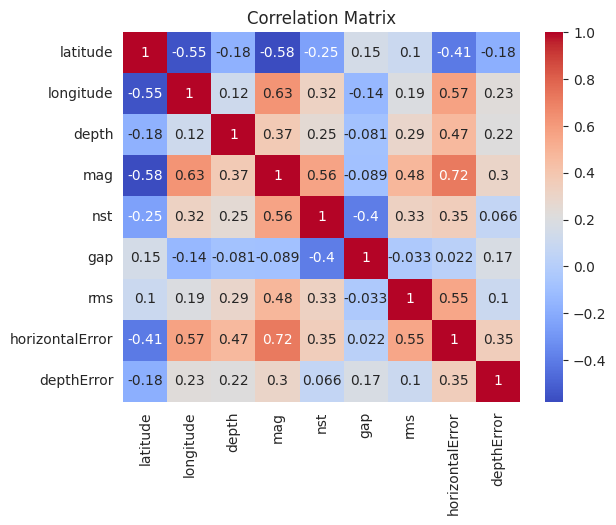

In [221]:
# Select the numerical columns for correlation analysis
numeric_cols = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms', 'horizontalError', 'depthError']

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-222-b8ebe31639c2>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


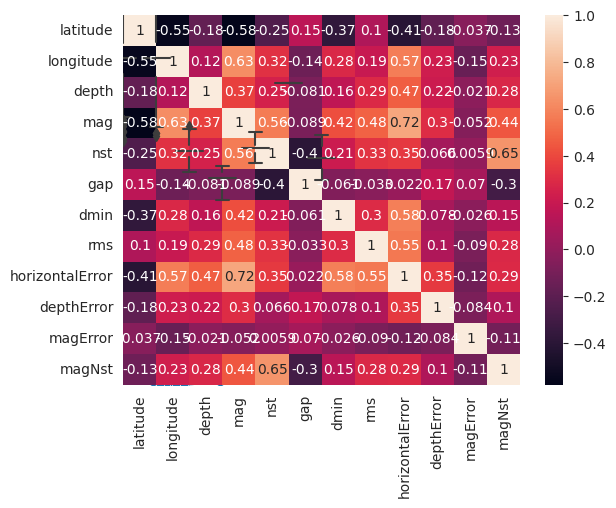

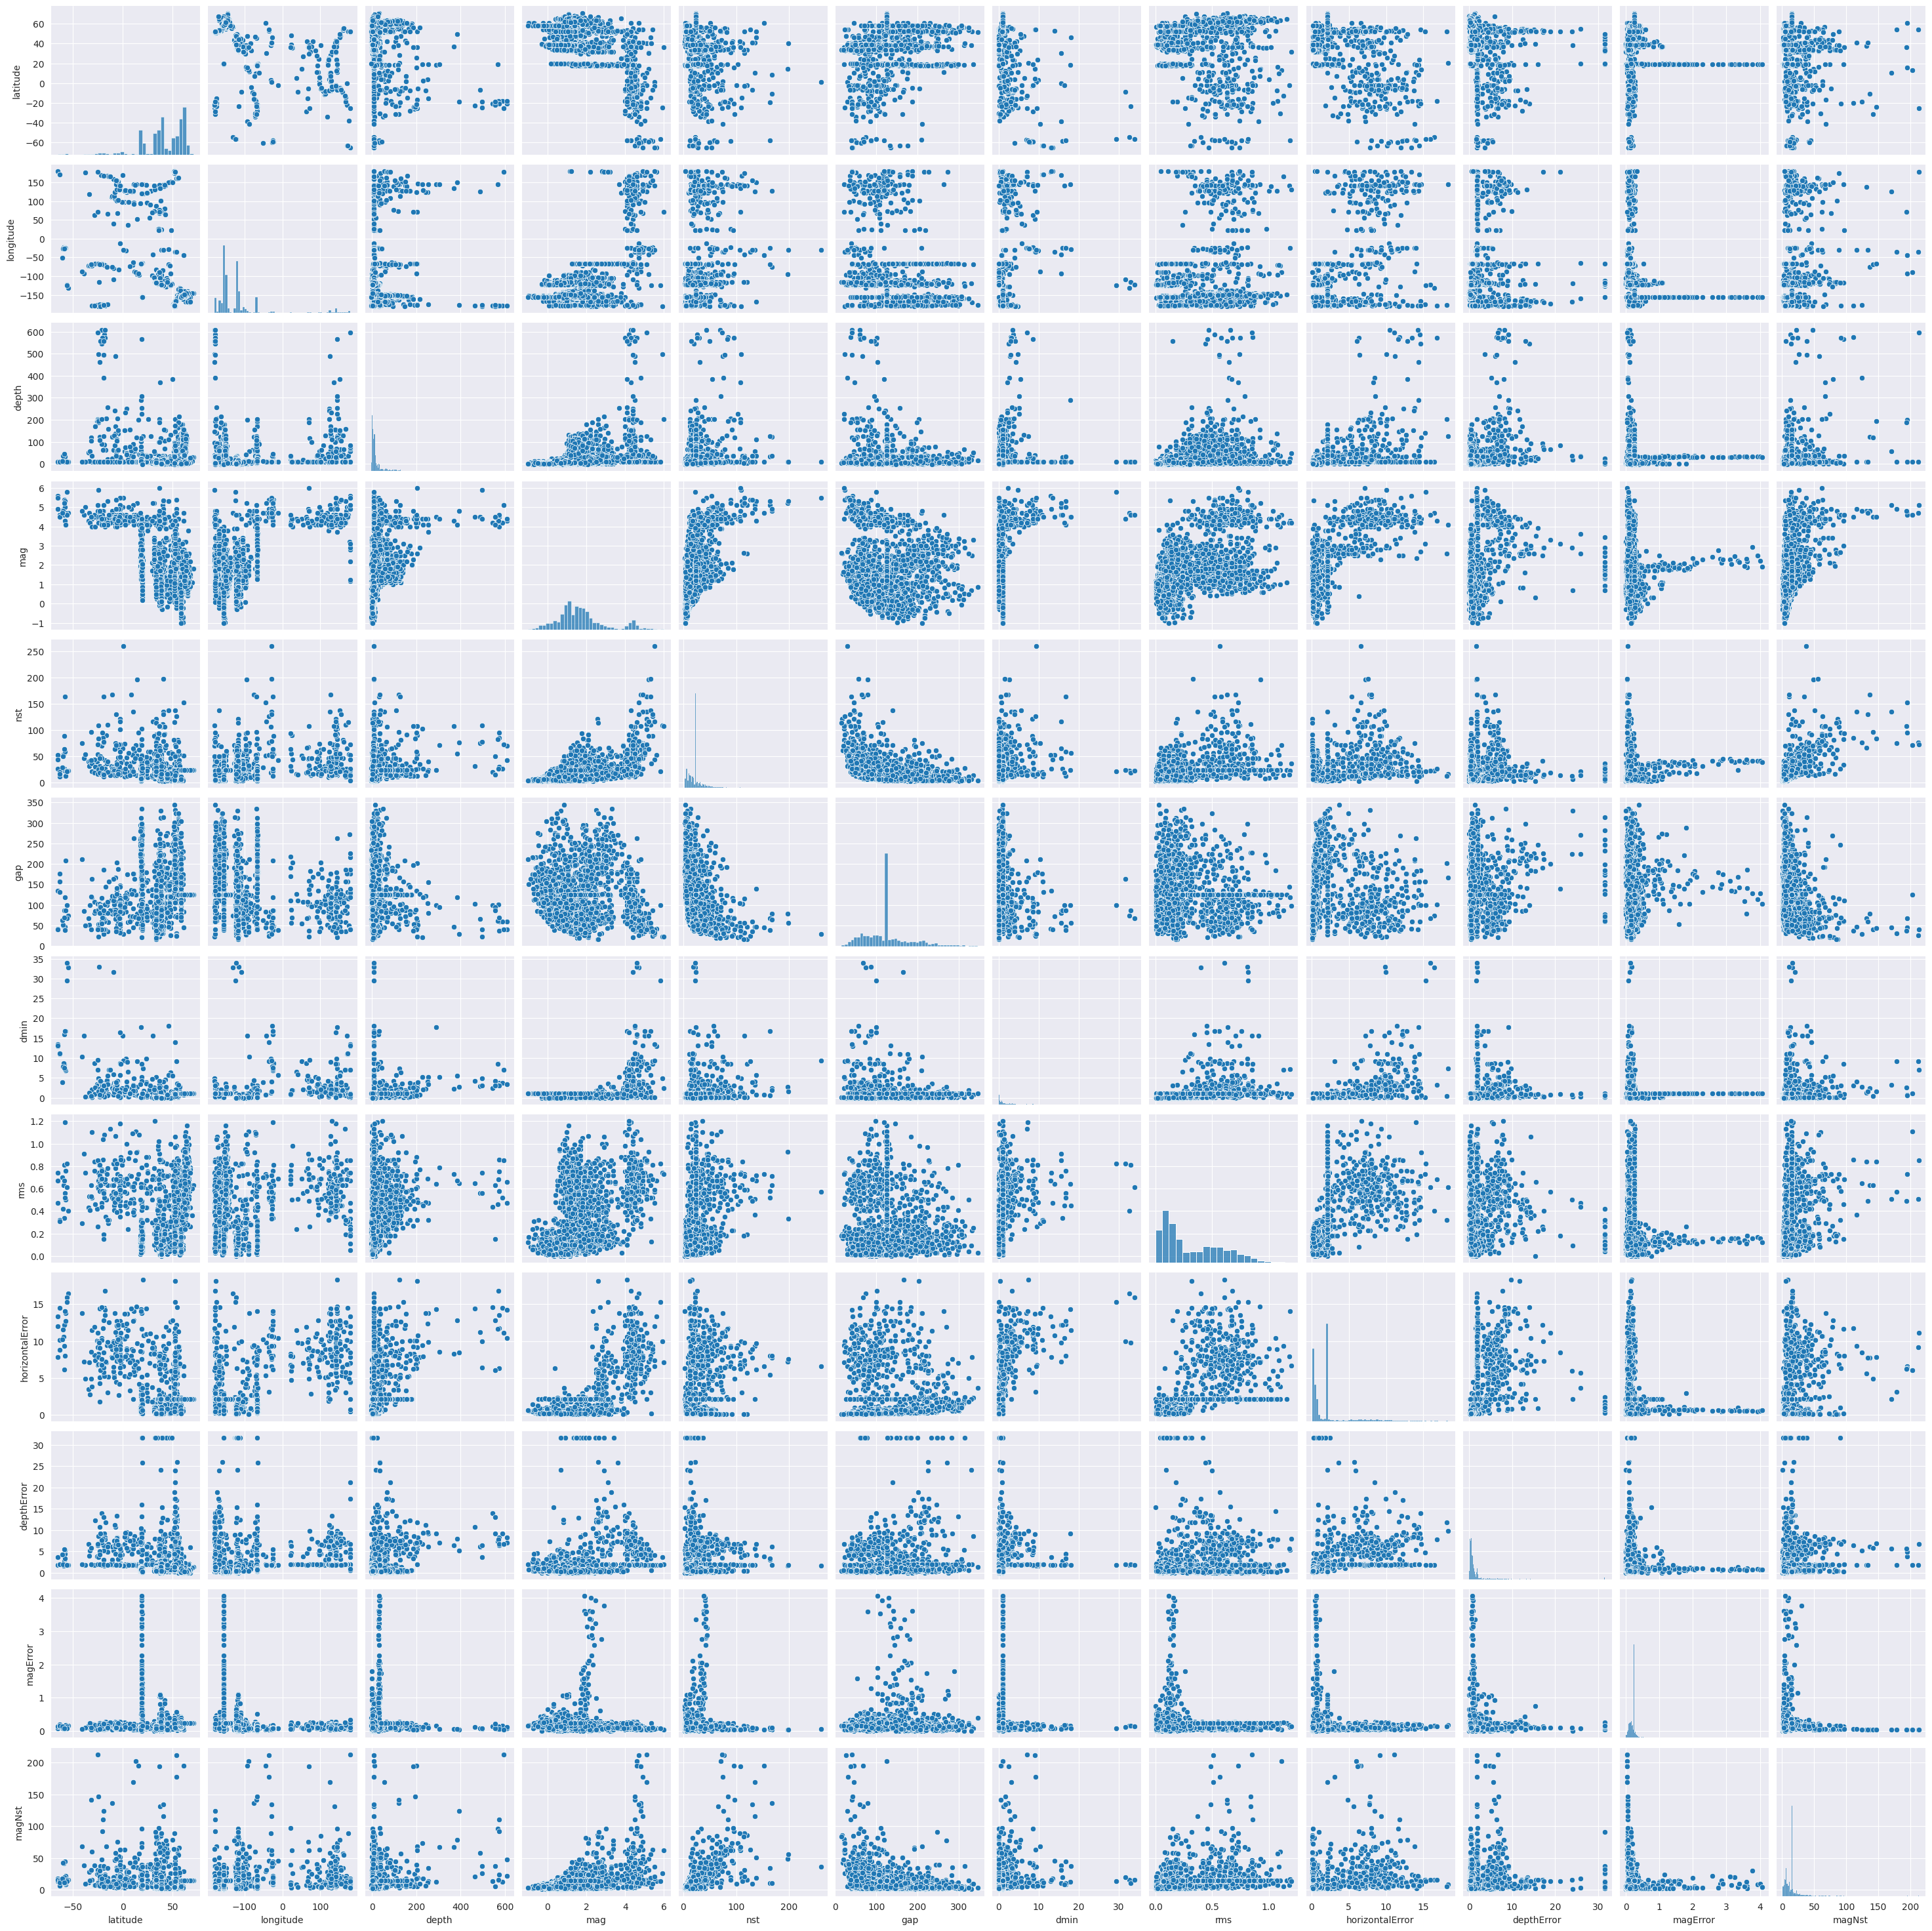

In [222]:
# Set style for all visualizations
sns.set_style("darkgrid")

# Scatter plot to show relationship between magnitude and depth
sns.scatterplot(data=df, x="mag", y="depth")

# Bar plot to show distribution of magnitudes
sns.histplot(data=df, x="mag")

# Box plot to show distribution of magnitudes by type
sns.boxplot(data=df, x="magType", y="mag")

# Heatmap to show correlation between variables
corr = df.corr()
sns.heatmap(corr, annot=True)

# Pairplot to show scatterplots of all possible variable combinations
sns.pairplot(df)

# Show all visualizations
plt.show()

In [223]:
# creating a new 'region' column by extracting region from 'place' column
df['region'] = df['place'].str.extract(',\s(.*$)')

# grouping by 'region' and calculating mean of 'mag' column for each group
mean_mag_by_region = df.groupby('region')['mag'].mean()

# separating the two groups based on the 'mag' column
group1 = df[df['mag'] < mean_mag_by_region.mean()]
group2 = df[df['mag'] >= mean_mag_by_region.mean()]

# performing independent t-test between the two groups
t_stat, p_val = ttest_ind(group1['mag'], group2['mag'], equal_var=False)

print("T-test statistic: ", t_stat)
print("P-value: ", p_val)

T-test statistic:  -100.37199880134662
P-value:  0.0


In [224]:
# Select the features we want to use
X = df[['latitude', 'longitude', 'depth', 'gap']]
y = df['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared score:', r2)

Mean squared error: 0.7753566651625924
R-squared score: 0.5170757112160782


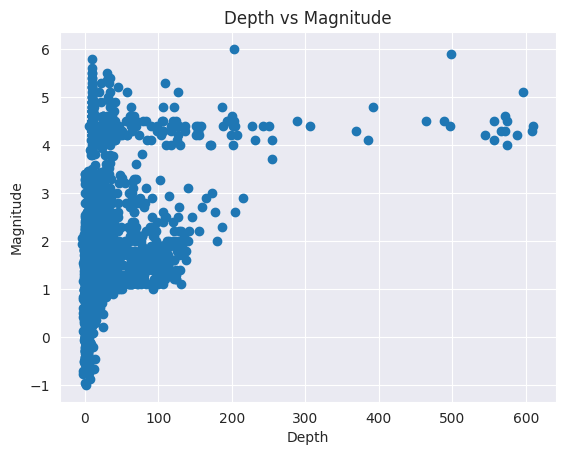

In [225]:
plt.scatter(df['depth'], df['mag'])
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Depth vs Magnitude')
plt.show()

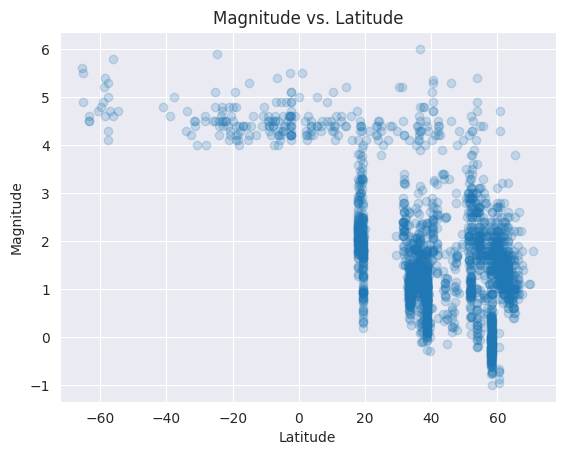

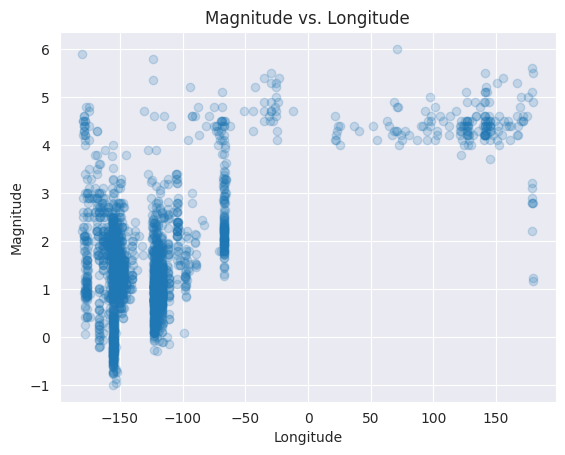

In [226]:
# Scatter plot of magnitude vs. latitude
plt.scatter(df['latitude'], df['mag'], alpha=0.2)
plt.xlabel('Latitude')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. Latitude')
plt.show()

# Scatter plot of magnitude vs. longitude
plt.scatter(df['longitude'], df['mag'], alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. Longitude')
plt.show()

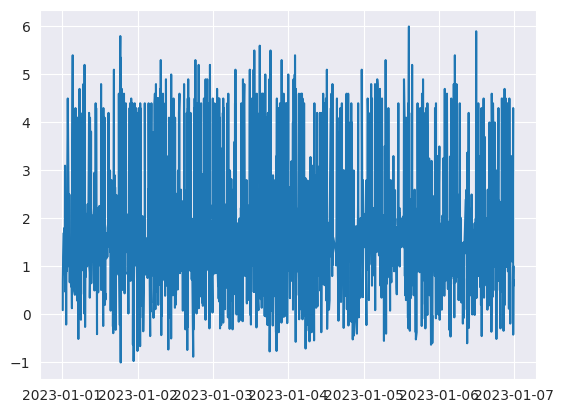

In [227]:
# Line plot of magnitude and time
plt.plot(df['time'], df['mag'])
plt.show()


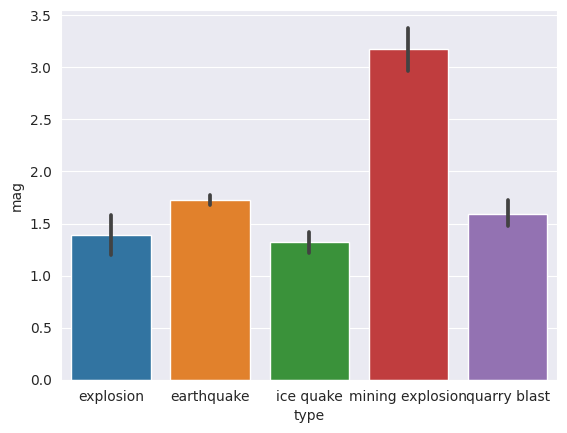

In [228]:
sns.barplot(data=df, x='type', y='mag')
plt.show()

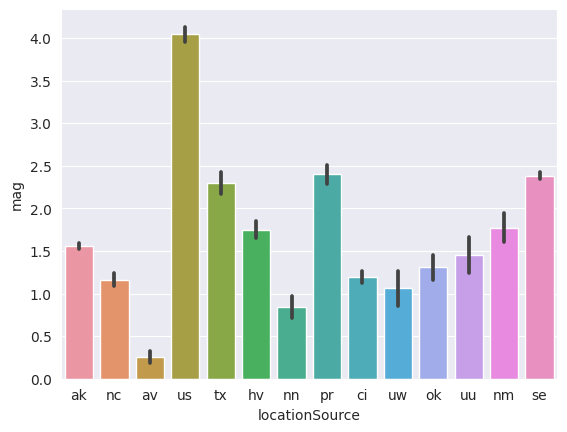

In [229]:
sns.barplot(data=df, x='locationSource', y='mag')
plt.show()

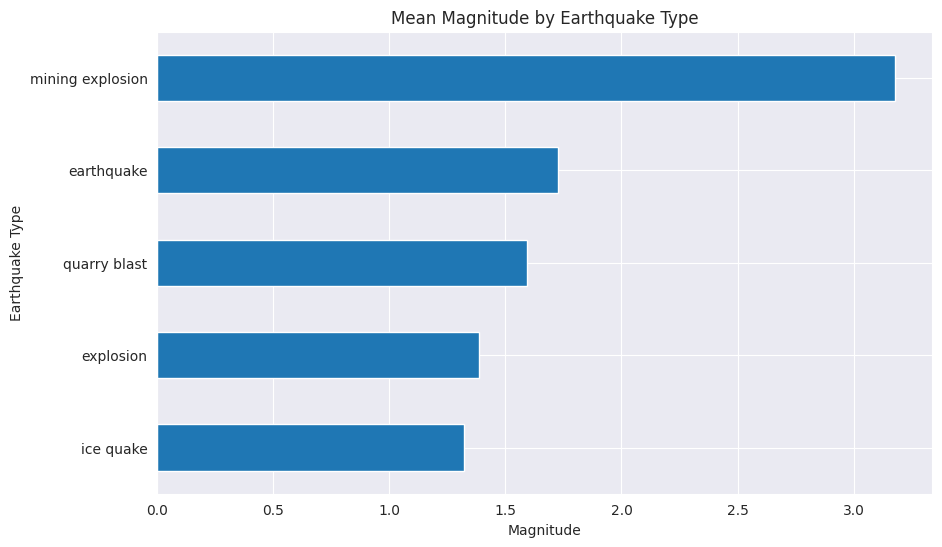

In [230]:
# Create a bar chart of the mean magnitude for each earthquake type
mean_mag_by_type = df.groupby('type')['mag'].mean().sort_values()
mean_mag_by_type.plot(kind='barh', figsize=(10,6))
plt.title('Mean Magnitude by Earthquake Type')
plt.xlabel('Magnitude')
plt.ylabel('Earthquake Type')
plt.show()

In [231]:
# Prepare the input and target variables for the model
X = df[['latitude', 'longitude', 'depth']]
y = df['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)


Mean squared error:  0.28599286518821493
R-squared score:  0.8218717820793706


In [234]:
latitude = 33
longitude = -118.25
depth = 10
year= 2023

In [235]:
# Convert the predictor data to a numpy array
new_data = np.array([[latitude, longitude, depth, year]])

# Use the trained model to make the prediction
predicted_mag = model.predict(new_data)

print("The predicted magnitude of the earthquake using the Random Forest model is: ", predicted_mag[0])

The predicted magnitude of the earthquake using the Random Forest model is:  3.261546841438216


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
